## Random Forest Regression Model

In [ ]:
import pandas as pd
import itertools
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('tableau-colorblind10')

pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
import seaborn as sns

import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from warnings import simplefilter
import warnings
warnings.filterwarnings("ignore")
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot

import statsmodels.api as sm
from scipy.stats import boxcox
from scipy.special import inv_boxcox
import xgboost as xgb
from xgboost import plot_importance, plot_tree

from datetime import timedelta
from math import sqrt
import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error


import statsmodels.api as sm
from scipy.stats import boxcox, jarque_bera, probplot
from scipy.special import inv_boxcox
from statsmodels.tsa.arima_model import ARIMA
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

from datetime import timedelta
from math import sqrt
import random

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error

import os

import warnings
warnings.filterwarnings("ignore")

### Extracting the data

In [2]:
# Import the entire dataset

df_oct19 = pd.read_csv('ts_dataset.csv').set_index('last_reported_2').sort_index()
df_oct19.index = pd.to_datetime(df_oct19.index)

print(f'DF shape: {df_oct19.shape}')
df_oct19.head()

DF shape: (35564, 27)


,Unnamed: 0,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,last_reported,is_charging_station,status,name,lat,lon,altitude,post_code,capacity,year,month,day,day_of_week,hour,minute,second,IsWeekday,TimeSlice
last_reported_2,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:19,10422,183,28,27,1,0,1,1,1,1.569888e+09,True,IN_SERVICE,"C/ GAVÀ, 1",41.372338,2.141875,61.0,8908.0,28.0,2019,10,1,1,0,1,19,True,0
2019-10-01 00:01:36,10368,126,17,17,0,5,1,1,1,1.569888e+09,True,IN_SERVICE,PG. DE COLOM /VIA LAIETANA,41.380679,2.181775,5.0,8908.0,23.0,2019,10,1,1,0,1,36,True,0
2019-10-01 00:02:04,10568,331,0,0,0,30,1,1,1,1.569888e+09,True,IN_SERVICE,"C/ CASTELLNOU, 65",41.397060,2.128010,82.0,8908.0,31.0,2019,10,1,1,0,2,4,True,0
2019-10-01 00:02:36,10344,102,0,0,0,24,1,1,1,1.569888e+09,True,IN_SERVICE,"AV. DIAGONAL, 612",41.392252,2.142044,69.0,8908.0,24.0,2019,10,1,1,0,2,36,True,0
2019-10-01 00:05:59,10778,126,17,17,0,5,1,1,1,1.569888e+09,True,IN_SERVICE,PG. DE COLOM /VIA LAIETANA,41.380679,2.181775,5.0,8908.0,23.0,2019,10,1,1,0,5,59,True,0


In [3]:
df_oct19.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35564 entries, 2019-10-01 00:01:19 to 2019-10-31 22:55:21
Data columns (total 27 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Unnamed: 0                            35564 non-null  int64  
 1   station_id                            35564 non-null  int64  
 2   num_bikes_available                   35564 non-null  int64  
 3   num_bikes_available_types.mechanical  35564 non-null  int64  
 4   num_bikes_available_types.ebike       35564 non-null  int64  
 5   num_docks_available                   35564 non-null  int64  
 6   is_installed                          35564 non-null  int64  
 7   is_renting                            35564 non-null  int64  
 8   is_returning                          35564 non-null  int64  
 9   last_reported                         35564 non-null  float64
 10  is_charging_station                   35564 non

In [4]:
df_oct19_1 = df_oct19.copy()

In [5]:
df_oct19_1 = df_oct19_1.drop(['Unnamed: 0', 'last_reported', 'name', 'lat', 'lon', 'post_code', 'capacity', 'second'], axis=1)
df_oct19_1.head()

,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,is_charging_station,status,altitude,year,month,day,day_of_week,hour,minute,IsWeekday,TimeSlice
last_reported_2,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:19,183,28,27,1,0,1,1,1,True,IN_SERVICE,61.0,2019,10,1,1,0,1,True,0
2019-10-01 00:01:36,126,17,17,0,5,1,1,1,True,IN_SERVICE,5.0,2019,10,1,1,0,1,True,0
2019-10-01 00:02:04,331,0,0,0,30,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,2,True,0
2019-10-01 00:02:36,102,0,0,0,24,1,1,1,True,IN_SERVICE,69.0,2019,10,1,1,0,2,True,0
2019-10-01 00:05:59,126,17,17,0,5,1,1,1,True,IN_SERVICE,5.0,2019,10,1,1,0,5,True,0


In [6]:
df_oct19_1.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 35564 entries, 2019-10-01 00:01:19 to 2019-10-31 22:55:21
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   station_id                            35564 non-null  int64  
 1   num_bikes_available                   35564 non-null  int64  
 2   num_bikes_available_types.mechanical  35564 non-null  int64  
 3   num_bikes_available_types.ebike       35564 non-null  int64  
 4   num_docks_available                   35564 non-null  int64  
 5   is_installed                          35564 non-null  int64  
 6   is_renting                            35564 non-null  int64  
 7   is_returning                          35564 non-null  int64  
 8   is_charging_station                   35564 non-null  bool   
 9   status                                35564 non-null  object 
 10  altitude                              35564 non

In [7]:
# Select data of interest

# data_of_interest = ['num_bikes_available', 'num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike', 'num_docks_available']

# df_select = df_oct19_1[data_of_interest + ['station_id']]

# print(f'The variables of interest are {len(data_of_interest)}: {data_of_interest}')
# print('')

stations_of_interest = [331, 183, 126, 102]

print(f'The stations of interest are {len(stations_of_interest)}: {stations_of_interest}')
print('')

# Select data for the time period of interest

# first_date = '2019-10-01 00:00:00'
# last_date = '2019-10-28 23:59:59'

# df_select = df_select.loc[first_date:last_date].sort_index()

# print(f'The time period is from {first_date} to {last_date}')
# print('')

# Inspect resulting dataframe

df_select = df_oct19_1.copy()
print(f'Filtered DF shape: {df_select.shape}')
df_select.head()

The stations of interest are 4: [331, 183, 126, 102]

Filtered DF shape: (35564, 19)


,station_id,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,is_charging_station,status,altitude,year,month,day,day_of_week,hour,minute,IsWeekday,TimeSlice
last_reported_2,,,,,,,,,,,,,,,,,,,
2019-10-01 00:01:19,183,28,27,1,0,1,1,1,True,IN_SERVICE,61.0,2019,10,1,1,0,1,True,0
2019-10-01 00:01:36,126,17,17,0,5,1,1,1,True,IN_SERVICE,5.0,2019,10,1,1,0,1,True,0
2019-10-01 00:02:04,331,0,0,0,30,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,2,True,0
2019-10-01 00:02:36,102,0,0,0,24,1,1,1,True,IN_SERVICE,69.0,2019,10,1,1,0,2,True,0
2019-10-01 00:05:59,126,17,17,0,5,1,1,1,True,IN_SERVICE,5.0,2019,10,1,1,0,5,True,0


In [8]:
# Generate dataframe for one variable and one station of interest

# var_interest = 'num_bikes_available'
station_of_interest = 331

var_station = df_select.loc[df_select['station_id'] == station_of_interest]
# var_station = var_station.drop(columns = [x for x in data_of_interest if x is not var_interest], axis=1)
var_station.drop('station_id', axis=1, inplace=True)
# var_station.fillna(method='ffill', inplace=True)

print(f'DF shape: {var_station.shape}')
print(f'Missing values: {var_station.isnull().sum()}')
var_station.head()

DF shape: (8891, 18)
Missing values: num_bikes_available                     0
num_bikes_available_types.mechanical    0
num_bikes_available_types.ebike         0
num_docks_available                     0
is_installed                            0
is_renting                              0
is_returning                            0
is_charging_station                     0
status                                  0
altitude                                0
year                                    0
month                                   0
day                                     0
day_of_week                             0
hour                                    0
minute                                  0
IsWeekday                               0
TimeSlice                               0
dtype: int64


,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,is_charging_station,status,altitude,year,month,day,day_of_week,hour,minute,IsWeekday,TimeSlice
last_reported_2,,,,,,,,,,,,,,,,,,
2019-10-01 00:02:04,0,0,0,30,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,2,True,0
2019-10-01 00:06:26,0,0,0,30,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,6,True,0
2019-10-01 00:10:48,0,0,0,30,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,10,True,0
2019-10-01 00:19:32,0,0,0,30,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,19,True,0
2019-10-01 00:23:54,1,1,0,29,1,1,1,True,IN_SERVICE,82.0,2019,10,1,1,0,23,True,1


In [9]:
df = var_station.copy()

choices = [True, True]
conditions = [(df['day']==1), (df['day']==18)]
df['IsDemonstrationDay'] = np.select(conditions, choices, default=False)

In [10]:
df.tail()

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,is_installed,is_renting,is_returning,is_charging_station,status,altitude,year,month,day,day_of_week,hour,minute,IsWeekday,TimeSlice,IsDemonstrationDay
last_reported_2,,,,,,,,,,,,,,,,,,,
2019-10-31 22:34:12,0,0,0,31,1,1,1,True,IN_SERVICE,82.0,2019,10,31,3,22,34,True,67,False
2019-10-31 22:38:29,0,0,0,31,1,1,1,True,IN_SERVICE,82.0,2019,10,31,3,22,38,True,67,False
2019-10-31 22:42:50,0,0,0,31,1,1,1,True,IN_SERVICE,82.0,2019,10,31,3,22,42,True,68,False
2019-10-31 22:47:11,0,0,0,31,1,1,1,True,IN_SERVICE,82.0,2019,10,31,3,22,47,True,68,False
2019-10-31 22:51:33,0,0,0,31,1,1,1,True,IN_SERVICE,82.0,2019,10,31,3,22,51,True,68,False


In [11]:
df.status.value_counts()

IN_SERVICE    8891
Name: status, dtype: int64

In [12]:
df.is_installed.value_counts()

1    8891
Name: is_installed, dtype: int64

In [13]:
df.is_renting.value_counts()

1    8891
Name: is_renting, dtype: int64

In [14]:
df.is_returning.value_counts()

1    8891
Name: is_returning, dtype: int64

In [15]:
df.is_charging_station.value_counts()

True    8891
Name: is_charging_station, dtype: int64

In [16]:
df = df.drop('status', axis=1)

In [17]:
df = df.drop('is_installed', axis=1)

In [18]:
df = df.drop('is_renting', axis=1)

In [19]:
df = df.drop('is_returning', axis=1)

In [20]:
df = df.drop('is_charging_station', axis=1)

In [21]:
df = df.drop('altitude', axis=1)

In [22]:
df.head()

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,day_of_week,hour,minute,IsWeekday,TimeSlice,IsDemonstrationDay
last_reported_2,,,,,,,,,,,,,
2019-10-01 00:02:04,0,0,0,30,2019,10,1,1,0,2,True,0,True
2019-10-01 00:06:26,0,0,0,30,2019,10,1,1,0,6,True,0,True
2019-10-01 00:10:48,0,0,0,30,2019,10,1,1,0,10,True,0,True
2019-10-01 00:19:32,0,0,0,30,2019,10,1,1,0,19,True,0,True
2019-10-01 00:23:54,1,1,0,29,2019,10,1,1,0,23,True,1,True


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8891 entries, 2019-10-01 00:02:04 to 2019-10-31 22:51:33
Data columns (total 13 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   num_bikes_available                   8891 non-null   int64
 1   num_bikes_available_types.mechanical  8891 non-null   int64
 2   num_bikes_available_types.ebike       8891 non-null   int64
 3   num_docks_available                   8891 non-null   int64
 4   year                                  8891 non-null   int64
 5   month                                 8891 non-null   int64
 6   day                                   8891 non-null   int64
 7   day_of_week                           8891 non-null   int64
 8   hour                                  8891 non-null   int64
 9   minute                                8891 non-null   int64
 10  IsWeekday                             8891 non-null   bool 
 11  TimeSli

In [24]:
# Mapping 0 to 6 day indices to Monday to Saturday 
day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day_of_week'] = df['day_of_week'].map(day_dict)

df.head(n=3)

,num_bikes_available,num_bikes_available_types.mechanical,num_bikes_available_types.ebike,num_docks_available,year,month,day,day_of_week,hour,minute,IsWeekday,TimeSlice,IsDemonstrationDay
last_reported_2,,,,,,,,,,,,,
2019-10-01 00:02:04,0,0,0,30,2019,10,1,Tuesday,0,2,True,0,True
2019-10-01 00:06:26,0,0,0,30,2019,10,1,Tuesday,0,6,True,0,True
2019-10-01 00:10:48,0,0,0,30,2019,10,1,Tuesday,0,10,True,0,True


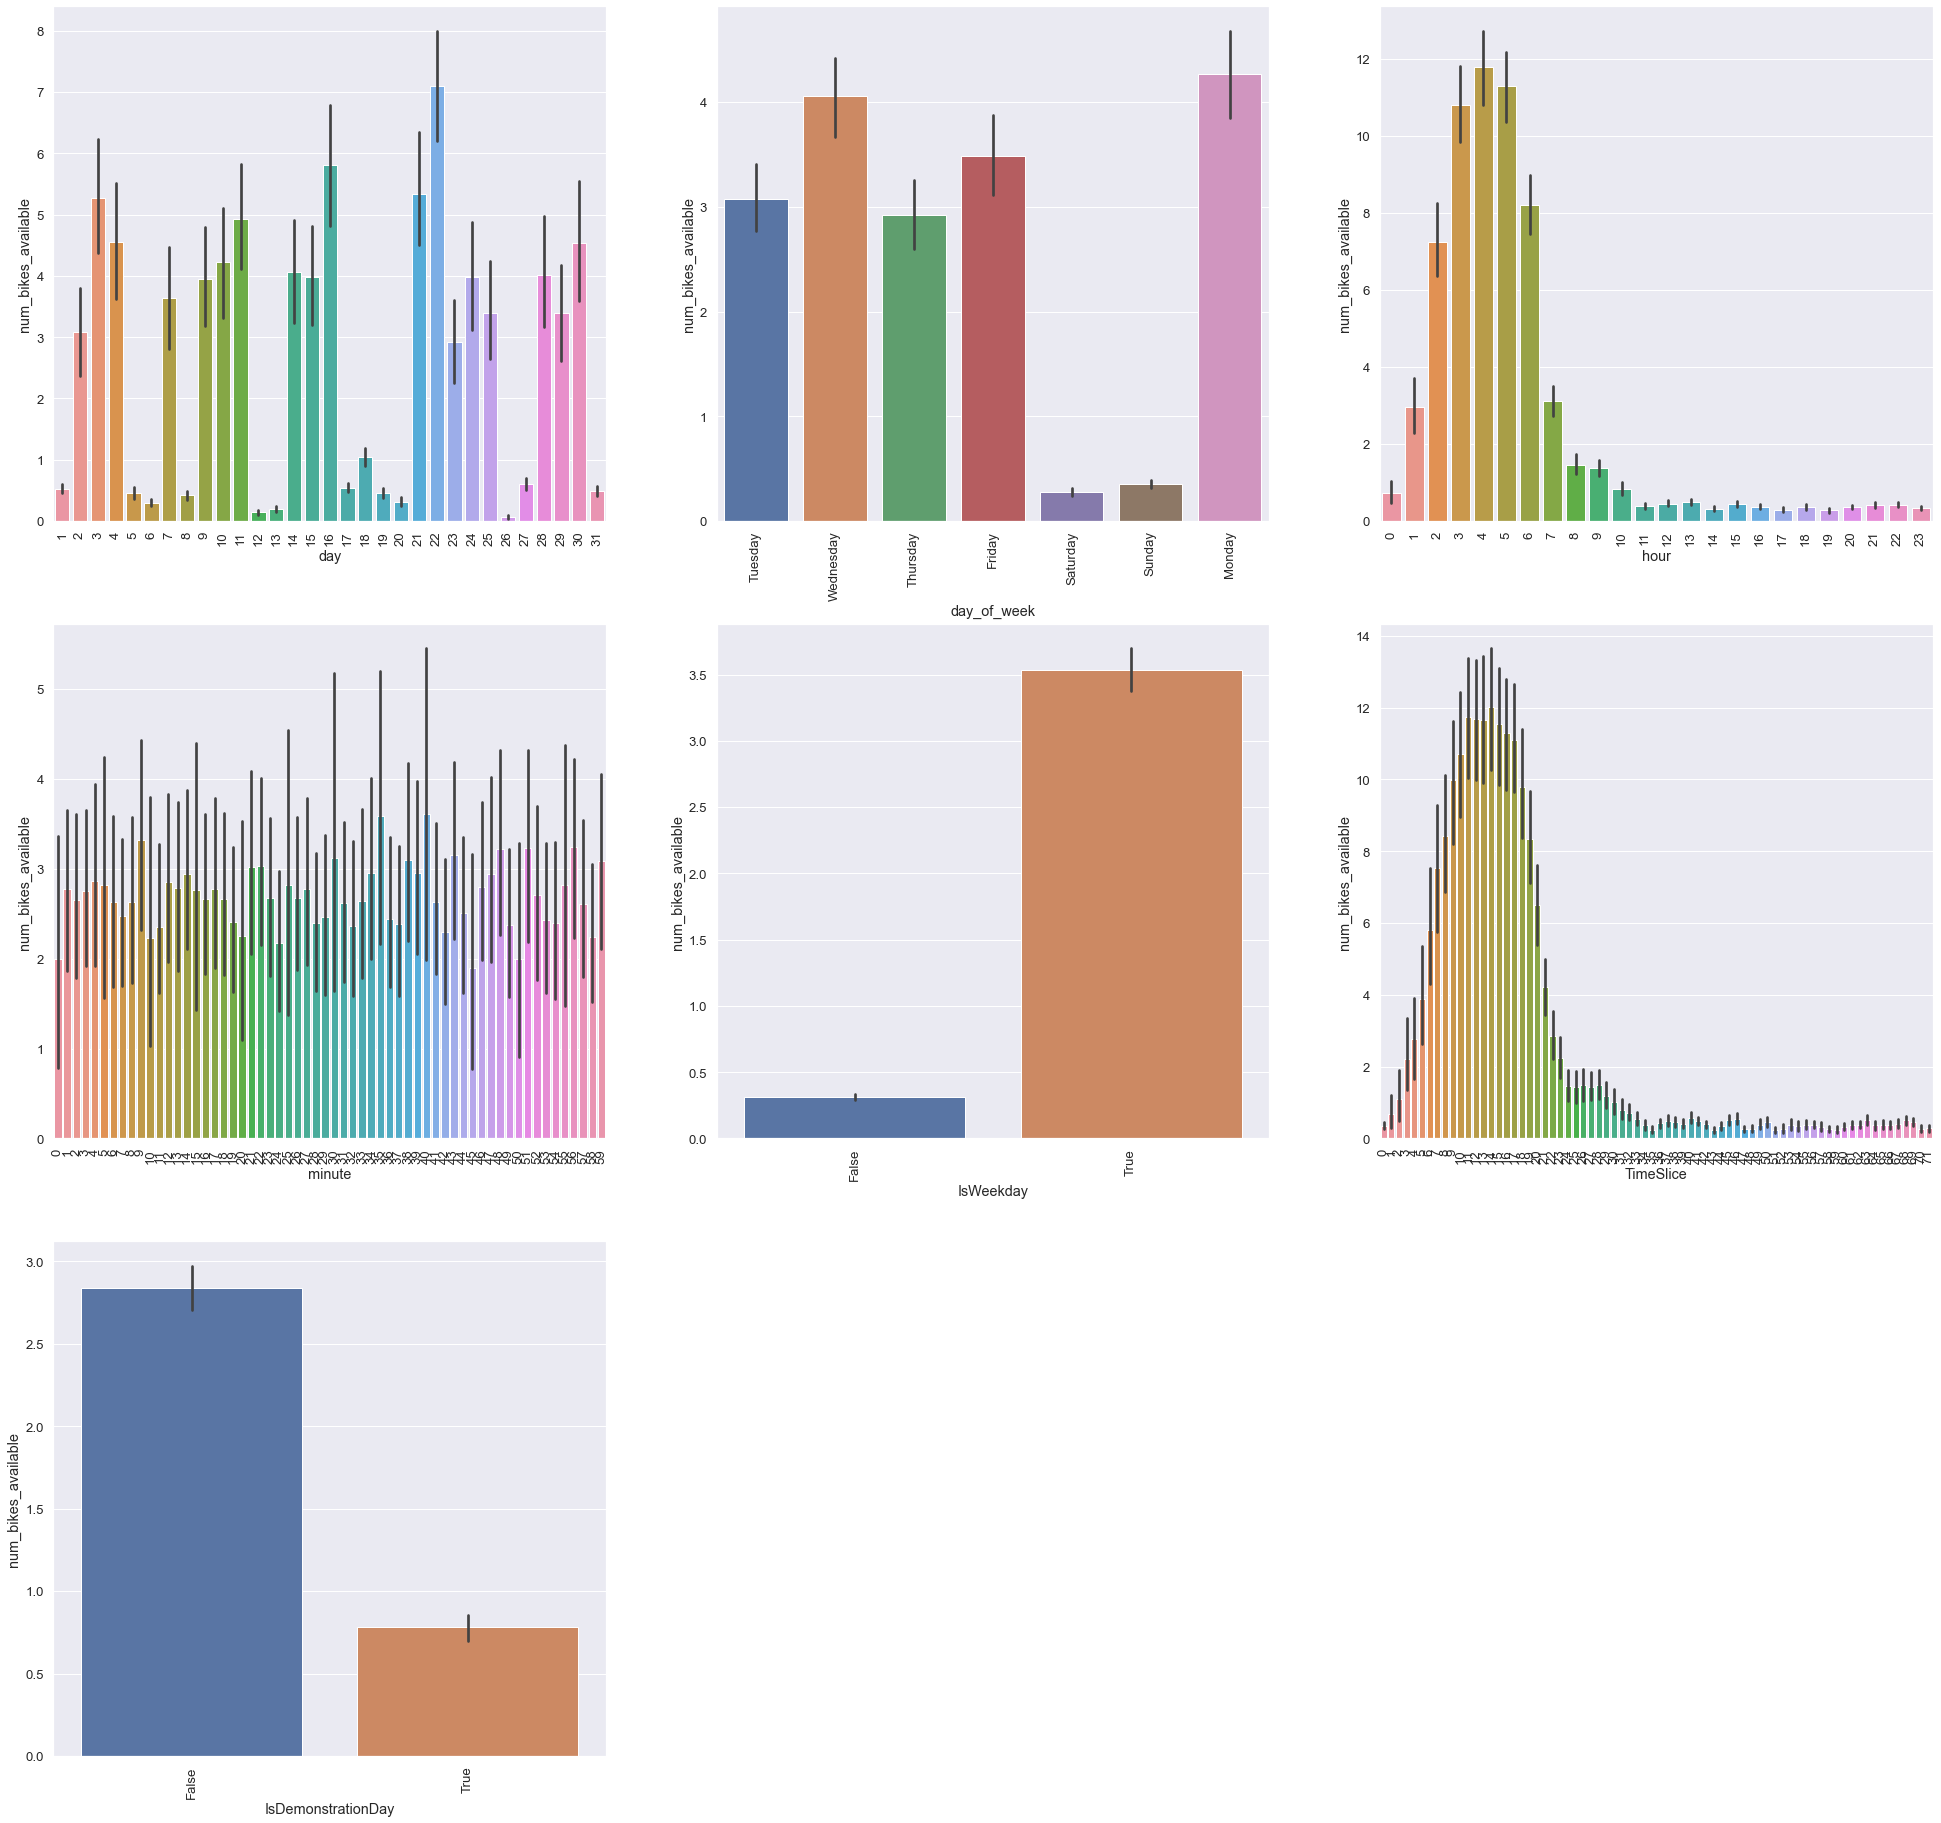

In [25]:
# Plotting how every feature correlate with the "target"
sns.set(font_scale=1.2)
plt.figure(figsize=(30, 30))

categorical_col = ['day', 'day_of_week', 'hour', 'minute', 'IsWeekday', 'TimeSlice', 'IsDemonstrationDay']

for i, column in enumerate(categorical_col, 1):
    plt.subplot(3, 3, i)
    g = sns.barplot(x=f"{column}", y='num_bikes_available', data=df)
    g.set_xticklabels(g.get_xticklabels(), rotation=90)
    plt.ylabel('num_bikes_available')
    plt.xlabel(f'{column}')

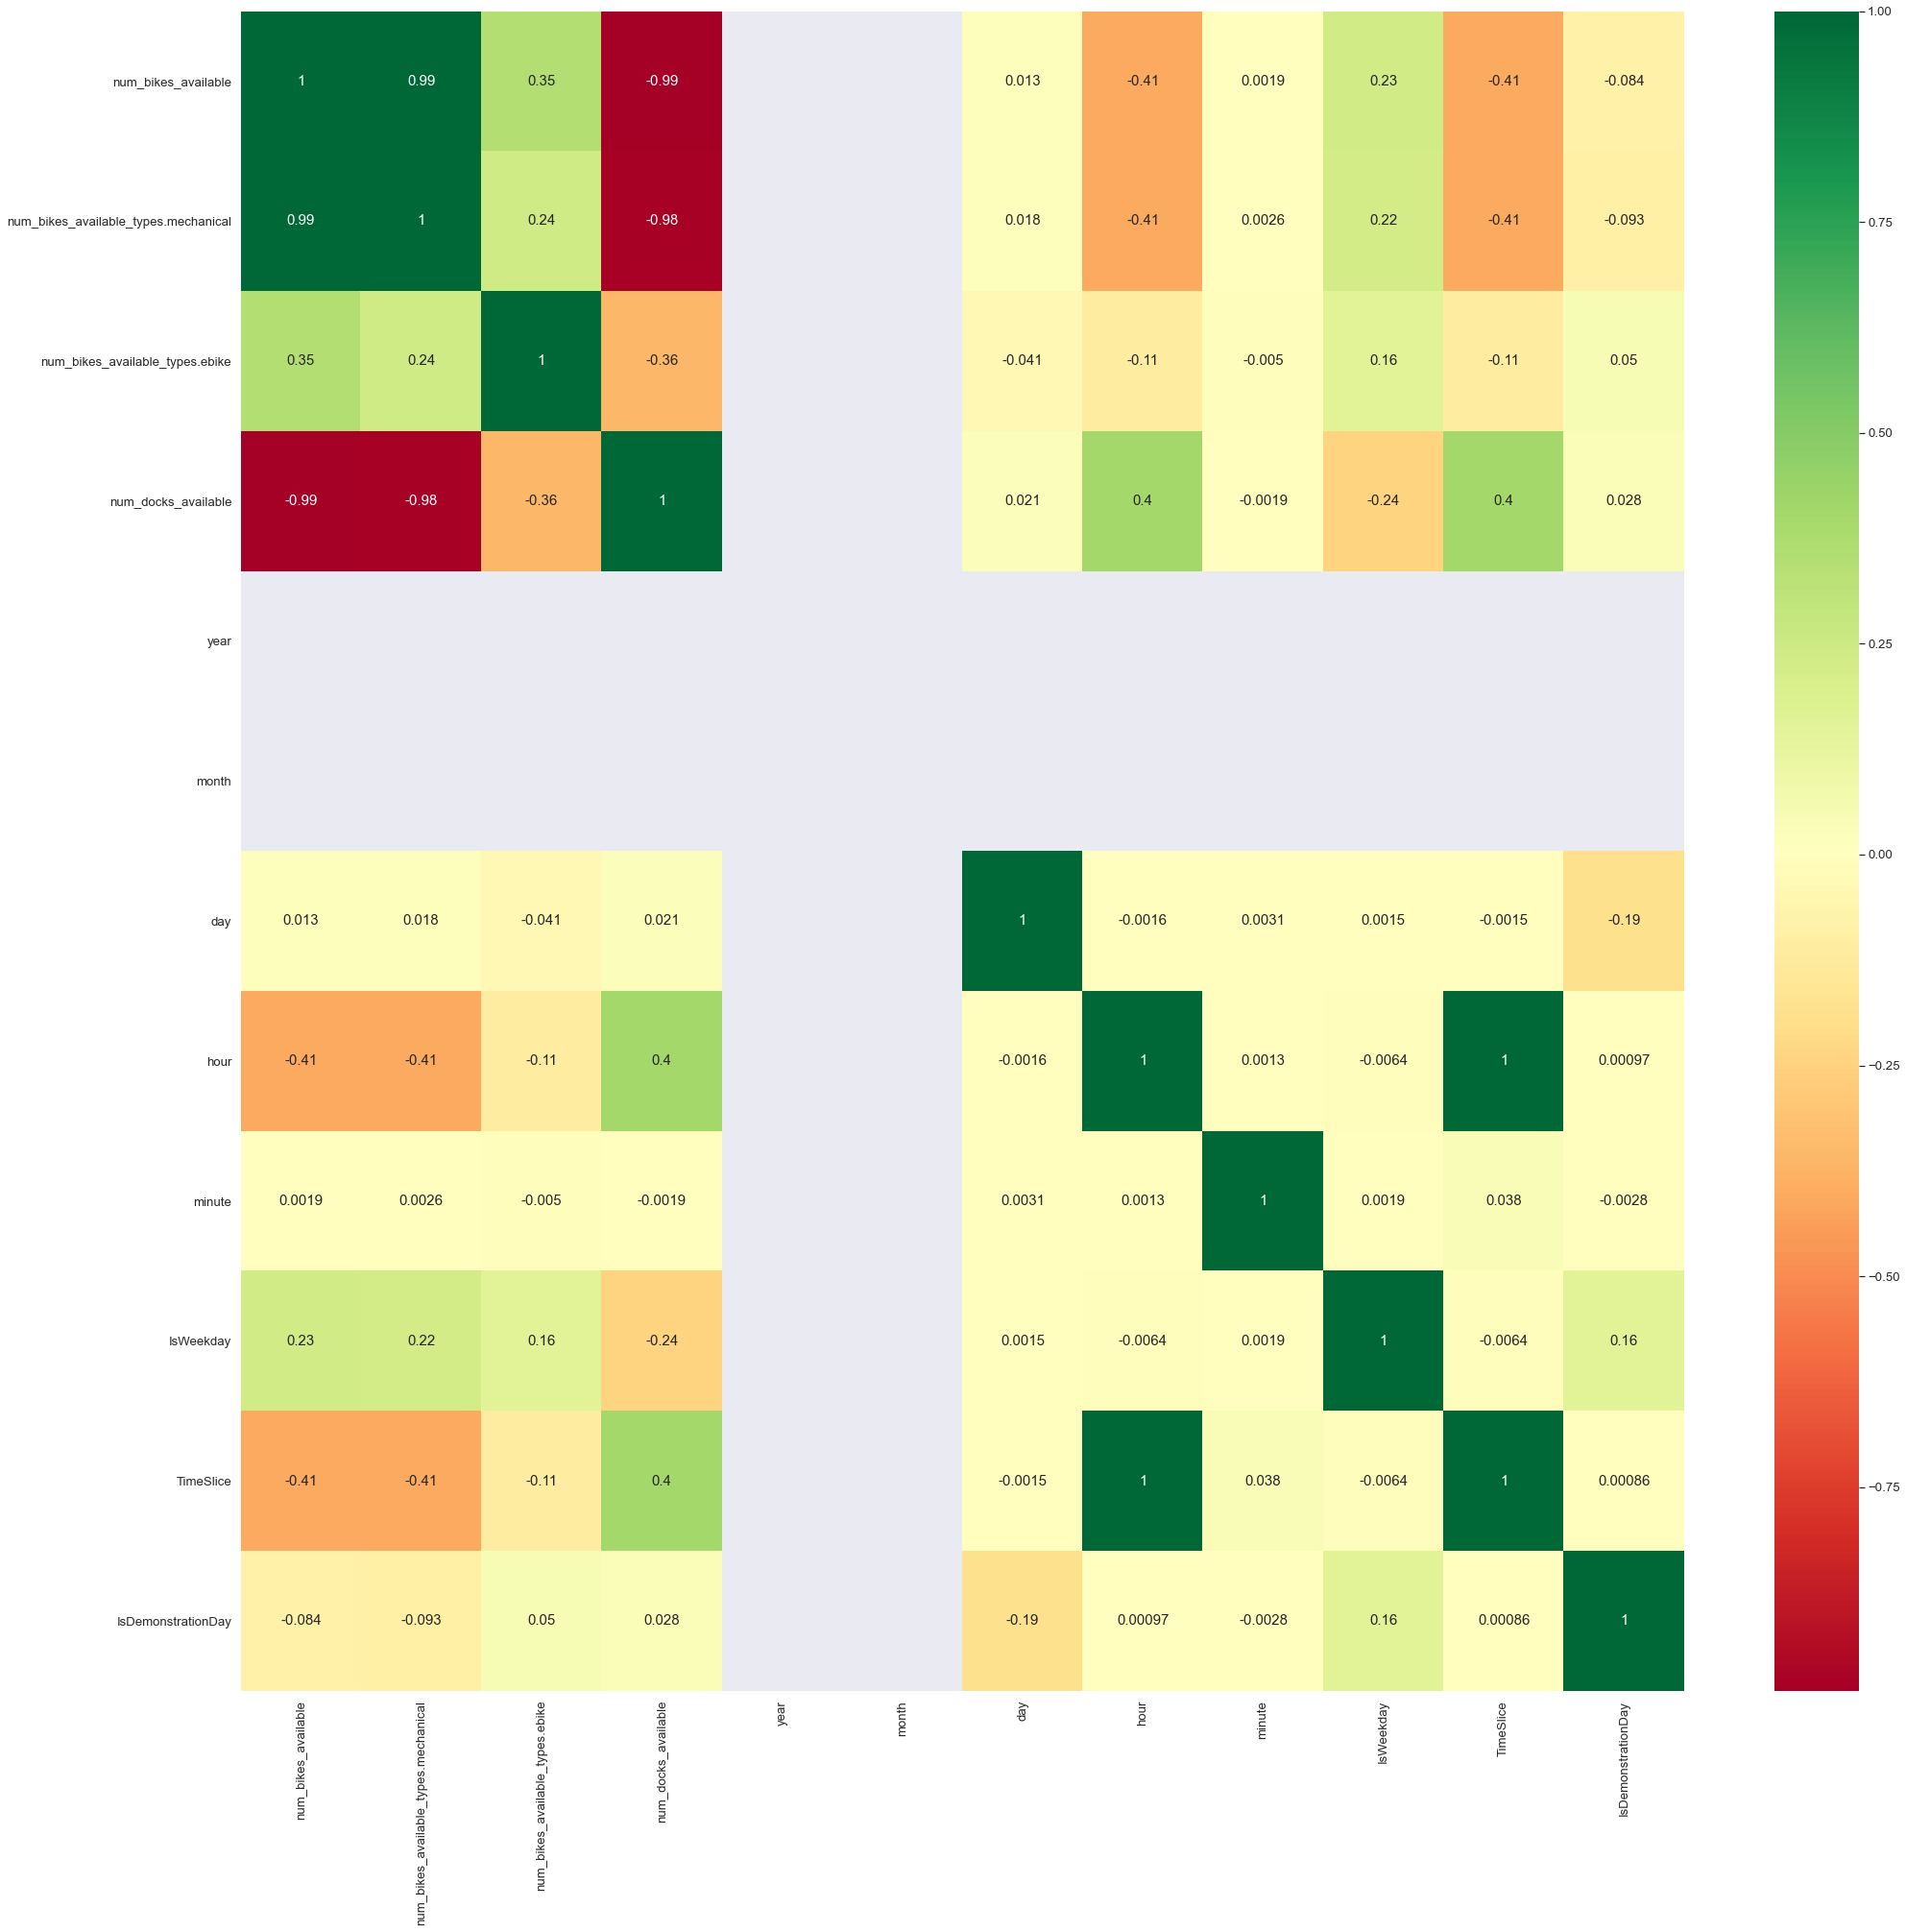

In [26]:
plt.figure(figsize=(30, 30))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [27]:
# Hourly Distribution

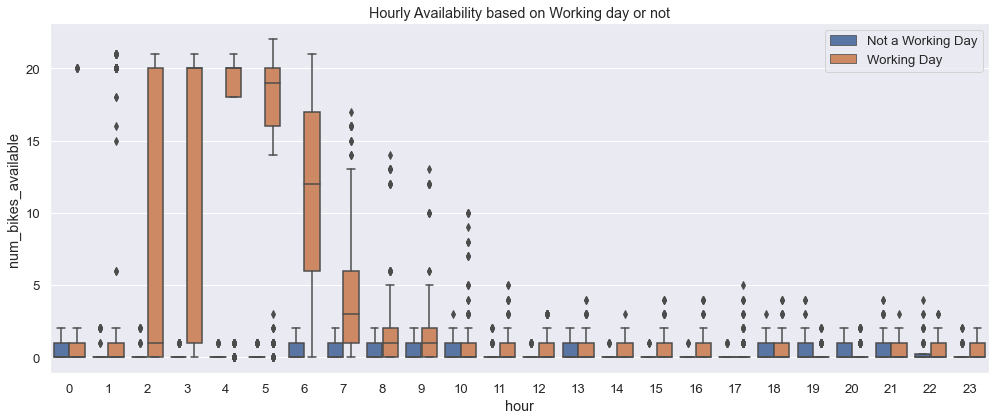

In [28]:
# seaborn boxplots across hours
f, axes = plt.subplots(1, 1, figsize=(15, 6))
sns.boxplot(data=df, y='num_bikes_available', x='hour', hue='IsWeekday', ax=axes)
handles, _ = axes.get_legend_handles_labels()
axes.legend(handles, ['Not a Working Day', 'Working Day'])
axes.set(title='Hourly Availability based on Working day or not')

plt.show()


In [29]:
# Plotting average bike availability for each hour as a function of various categories.

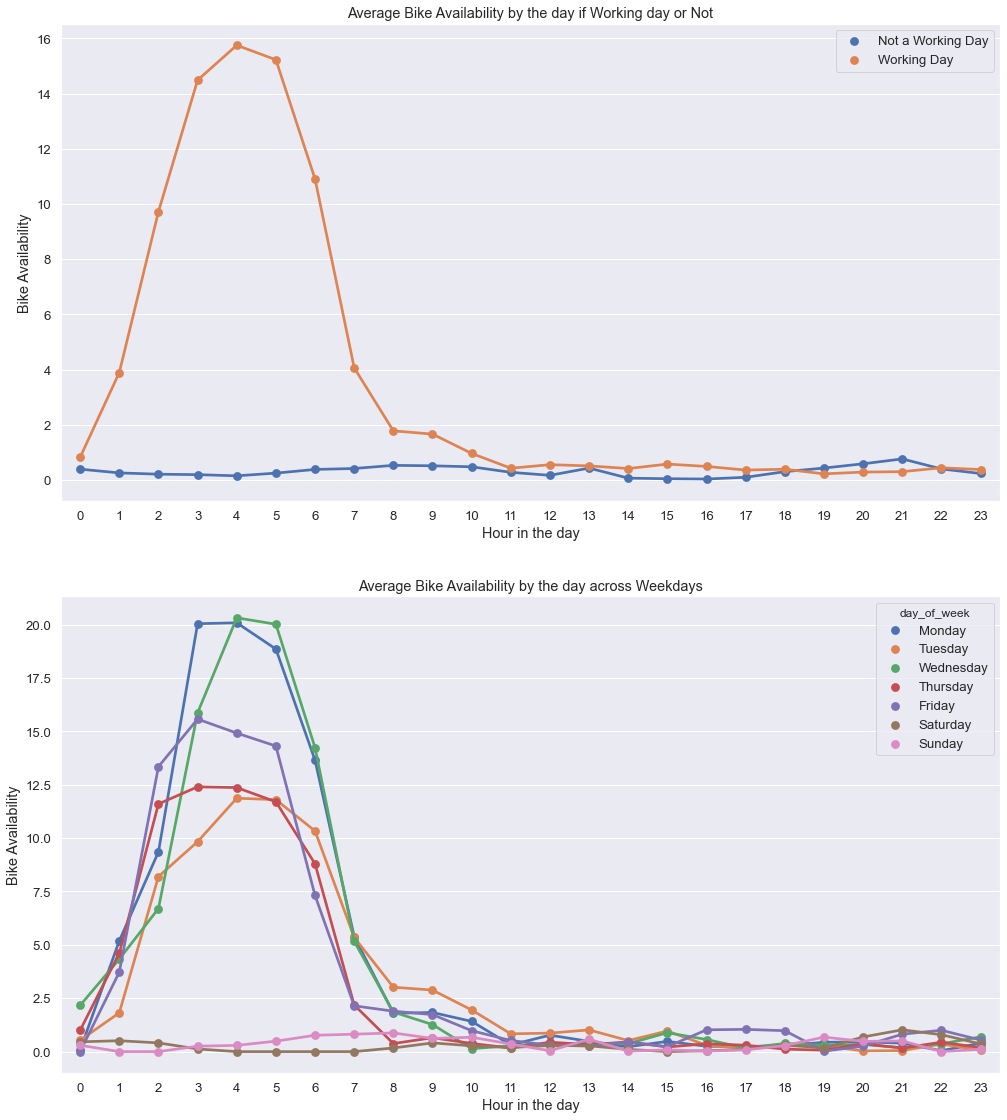

In [30]:
# Plots of average availability across hour in a day for various categories

f, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 18))
group_work_hour = pd.DataFrame(df.groupby(['IsWeekday', 'hour'])['num_bikes_available'].mean()).reset_index()
sns.pointplot(data=group_work_hour, x='hour', y='num_bikes_available', hue='IsWeekday', ax=axes[0], legend=True)
handles, _ = axes[0].get_legend_handles_labels()
axes[0].legend(handles, ['Not a Working Day', 'Working Day'])
axes[0].set(xlabel='Hour in the day', ylabel='Bike Availability', title='Average Bike Availability by the day if Working day or Not')

hue_order= ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
group_day_hour = pd.DataFrame(df.groupby(['day_of_week', 'hour'])['num_bikes_available'].mean()).reset_index()
sns.pointplot(data=group_day_hour, x='hour', y='num_bikes_available', hue='day_of_week', ax=axes[1], hue_order=hue_order)
axes[1].set(xlabel='Hour in the day', ylabel='Bike Availability', title='Average Bike Availability by the day across Weekdays')

plt.show()

We have lots of categorical columns. We will transform each relevant and important categorical columns into binary vector columns. Later drop all the columns that are not required (redundant or very low correlation).

I am going to map the categorical variables IsWeekday and IsDemonstrationDay:

In [31]:
df_1 = df.copy()

# Using numbers to represent categorical data to transform the categorical columns
IsWeekday_dict = {False:0, True:1}
IsDemonstrationDay_dict = {False:0, True:1}
day_of_week_dict = {'Monday':0, 'Tuesday':1, 'Wednesday':2, 'Thursday':3, 'Friday':4, 'Saturday':5, 'Sunday':6}

df_1['IsWeekday'] = df_1['IsWeekday'].map(IsWeekday_dict)
df_1['IsDemonstrationDay'] = df_1['IsDemonstrationDay'].map(IsDemonstrationDay_dict)
df_1['day_of_week'] = df_1['day_of_week'].map(day_of_week_dict)


# Dropping columns from the provided data set that are either highly correlated with the existing columns: 
# season with month, holiday and day with workingday, temp with atemp
# or poorly correlated with the target column: windspeed and date
drop_columns_1 = ['num_bikes_available_types.mechanical', 'num_bikes_available_types.ebike', 'year', 'month', 'num_docks_available', 'minute', 'TimeSlice']
df_1 = df_1.drop(drop_columns_1, axis=1)
df_1.head(n=3)

,num_bikes_available,day,day_of_week,hour,IsWeekday,IsDemonstrationDay
last_reported_2,,,,,,
2019-10-01 00:02:04,0,1,1,0,1,1
2019-10-01 00:06:26,0,1,1,0,1,1
2019-10-01 00:10:48,0,1,1,0,1,1


In [32]:
day_of_week=pd.get_dummies(df_1['day_of_week'], prefix='day_of_week')
hour=pd.get_dummies(df_1['hour'], prefix='hour')
df_2=pd.concat([df_1, day_of_week, hour],axis=1)

df_2.columns

Index(['num_bikes_available', 'day', 'day_of_week', 'hour', 'IsWeekday', 'IsDemonstrationDay', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'day_of_week_6', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23'], dtype='object')

Dropping columns and the last binary vector column (which are fully correlated and can be expressed as a function of other columns)

In [33]:
# Dropping columns and the last binary vector column 
drop_columns_2 = ['day_of_week', 'hour', 'day_of_week_6', 'hour_23']

df_2 = df_2.drop(drop_columns_2, axis=1)

df_2.columns

Index(['num_bikes_available', 'day', 'IsWeekday', 'IsDemonstrationDay', 'day_of_week_0', 'day_of_week_1', 'day_of_week_2', 'day_of_week_3', 'day_of_week_4', 'day_of_week_5', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19', 'hour_20', 'hour_21', 'hour_22'], dtype='object')

### Modelling
Since the bike rental trend is quite different between working and non-working day, we try the following two ways to solve this problem

1. Build 2 separate models - 1. for working day, and 2. for non-working day.
2. Build a single model using workingday as one of the features

### Function Definitions
Let us define few functions which we would call for every model

rmsle and rmsle_log: These are RMSLE (Root Mean Square Log Error) functions which will be used as our scoring function.

In [34]:
from sklearn.metrics import make_scorer

# Metric used to measure the model (Root Mean Square Log Error)
def rmsle(y_actual, y_pred):
    log1 = np.nan_to_num(np.array([np.log1p(v) for v in y_pred]))
    log2 = np.nan_to_num(np.array([np.log1p(v) for v in y_actual]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

# RMSLE function with inputs in log form. Used for CrossValidation scoring
def rmsle_log(logy_actual, logy_pred):
    calc = (logy_actual - logy_pred) ** 2
    return np.sqrt(np.mean(calc))
rmsle_cv = make_scorer(rmsle_log, greater_is_better=False)

plot_true_vs_pred: This is used to plot True and Predicted count values for a particular time interval

In [96]:
# Plots True vs. Predictied count values in a particular time interval
def plot_true_vs_pred (y_w_actual, y_nw_actual, y_w_pred, y_nw_pred, algo, t_from, t_to):
    fig = plt.figure(figsize=(18, 16))
    
    # Working day plot
    axes = fig.add_subplot(2, 1, 1)
    axes.plot(y_w_actual[t_from:t_to], label='Actual', markersize=15, color='tab:cyan')
    axes.plot(y_w_pred[t_from:t_to], label='Predicted', markersize=15, color='lightpink')
    axes.set(xlabel='Time', ylabel='num_bikes_available', title='{0} Model for Working Day: Count between time {1} and {2}'.format(algo, t_from, t_to))
    axes.legend()
    

    # Non working day plot
    axes = fig.add_subplot(2, 1, 2)
    axes.plot(y_nw_actual[t_from:t_to], label='Actual', markersize=15, color='tab:cyan')
    axes.plot(y_nw_pred[t_from:t_to], label='Predicted', markersize=15, color='lightpink')
    axes.set(xlabel='Time', ylabel='num_bikes_available', title='{0} Model for Non Working Day: Count between time {1} and {2}'.format(algo, t_from, t_to))
    axes.legend()
    plt.show()

### model_fit:
Since we will be trying out various models to figure out which works best, let us customize a fit and predict function which will fit the trainging data and predict on the test data and return the required metrics.
The below function can fit/predict training and testing data for one of these two cases:

Working and non-working days or combined working and non-working days.
The output returned by the function are:

- rmsle for training, test data for working, non-working and combined
- predicted y for training, test for working/non-working or combined

In [36]:
# Customized Function to fit/predict training and testing data for:
# 1. working and non-working days or 2. combined working and non-working days
# Output: 1. rmsle for training, test data for working, non-working and combined 
#         2. predicted y for training, test for working/non-working or combined
def model_fit (model_w, X_tr_w, X_t_w, y_tr_w, y_t_w, model_nw=None, X_tr_nw=None, X_t_nw=None, y_tr_nw=None, y_t_nw=None):
    ''' Case 1: If separate models for Working day and non-working day
    model_w, model_nw = Models for Working and non-working days, respectively
    X_tr_w, y_tr_w = Training data set for Working days
    X_t_w, y_t_w = Testing data set for Working days
    X_tr_nw, y_tr_nw = Training data set for Non Working days
    X_t_nw, y_t_nw = Testing data set for Non Working days 
    
    Case 2: If single model for working day and non-working day 
    model_w = Single Model for Working and non-working days
    X_tr_w, y_tr_w = Training data set containing both Working and non-working days (feature list must contain 'workingday')
    X_t_w, y_t_w = Testing data set containing both Working and non-working days'''
    
    # Working Day Modeling of Single Model for Working and Non-Working Day
    model_w.fit(X_tr_w, np.log1p(y_tr_w))
    logy_tr_w_predict = model_w.predict(X_tr_w)
    logy_t_w_predict = model_w.predict(X_t_w)
    
    y_tr_w_predict = np.expm1(logy_tr_w_predict)
    y_t_w_predict = np.expm1(logy_t_w_predict)
    
    rmsle_w_tr = rmsle(y_tr_w, y_tr_w_predict)
    rmsle_w_t = rmsle(y_t_w, y_t_w_predict)
    
    if model_nw is None:
        # Single Model for working and non-working days. The feature list in X should have workingday column
        [rmsle_avg_tr, rmsle_avg_t] = [rmsle_w_tr, rmsle_w_t] # The RMSLE computed by the first model is the overall RMSLE
        rmsle_w_tr = rmsle(y_tr_w[X_tr_w.IsWeekday==1], y_tr_w_predict[X_tr_w.IsWeekday==1])
        rmsle_nw_tr = rmsle(y_tr_w[X_tr_w.IsWeekday==0], y_tr_w_predict[X_tr_w.IsWeekday==0])
        rmsle_w_t = rmsle(y_t_w[X_t_w.IsWeekday==1], y_t_w_predict[X_t_w.IsWeekday==1])
        rmsle_nw_t = rmsle(y_t_w[X_t_w.IsWeekday==0], y_t_w_predict[X_t_w.IsWeekday==0])
        y_tr_nw_predict, y_t_nw_predict = None, None
    else:
        # Non-working day Modeling
        model_nw.fit(X_tr_nw, np.log1p(y_tr_nw))
        logy_tr_nw_predict = model_nw.predict(X_tr_nw)
        logy_t_nw_predict = model_nw.predict(X_t_nw)

        y_tr_nw_predict = np.expm1(logy_tr_nw_predict)
        y_t_nw_predict = np.expm1(logy_t_nw_predict)

        rmsle_nw_tr = rmsle(y_tr_nw, y_tr_nw_predict)
        rmsle_nw_t = rmsle(y_t_nw, y_t_nw_predict)

        # Combined RMSLE
        [rmsle_avg_tr, rmsle_avg_t] = [rmsle(np.concatenate([y_tr_w, y_tr_nw]), np.concatenate([y_tr_w_predict, y_tr_nw_predict])), 
                                       rmsle(np.concatenate([y_t_w, y_t_nw]), np.concatenate([y_t_w_predict, y_t_nw_predict]))]
    
    rmsle_all = [rmsle_w_tr, rmsle_nw_tr, rmsle_avg_tr, rmsle_w_t, rmsle_nw_t, rmsle_avg_t]
    y_pred_all = [y_tr_w_predict, y_t_w_predict, y_tr_nw_predict, y_t_nw_predict]
    
    return(rmsle_all, y_pred_all)

### cros_val:
This function is used to split the data into cv folds, train on cv-1 folds, test on the left out fold and most importantly save the predicted values of the left out fold. THese predictions are used as inputs for stacking.

In [37]:
def cross_val(model_w, X_in_w, y_in_w, model_nw=None, X_in_nw=None, y_in_nw=None, cv=5):
    y_val_pred_w = pd.Series(index=y_in_w.index)
    y_val_pred_nw = None if model_nw == None else pd.Series(index=y_in_nw.index)
    for idx in range(cv):
        from_, to_ = idx*15/cv, (idx+1)*15/cv
        
        val_idx_w = (X_in_w.index.day>from_) & (X_in_w.index.day<=to_)
        train_idx_w = ~val_idx_w
        
        X_idx_w, y_idx_w, X_val_idx_w = X_in_w[train_idx_w], y_in_w[train_idx_w], X_in_w[val_idx_w]
        model_w.fit(X_idx_w, np.log1p(y_idx_w))
        logy_val_pred_idx_w = model_w.predict(X_val_idx_w)
        y_val_pred_w[val_idx_w] = np.expm1(logy_val_pred_idx_w)
        
        if model_nw is not None:
            val_idx_nw = (X_in_nw.index.day>from_) & (X_in_nw.index.day<=to_)
            train_idx_nw = ~val_idx_nw
            
            X_idx_nw, y_idx_nw, X_val_idx_nw = X_in_nw[train_idx_nw], y_in_nw[train_idx_nw], X_in_nw[val_idx_nw]
            model_nw.fit(X_idx_nw, np.log1p(y_idx_nw))
            logy_val_pred_idx_nw = model_nw.predict(X_val_idx_nw)
            y_val_pred_nw[val_idx_nw] = np.expm1(logy_val_pred_idx_nw)
    
    if model_nw is None: 
        rmsle_avg = rmsle(y_in_w, y_val_pred_w)
        rmsle_w = rmsle(y_in_w[X_in_w.IsWeekday==1], y_val_pred_w[X_in_w.IsWeekday==1])
        rmsle_nw = rmsle(y_in_w[X_in_w.IsWeekday==0], y_val_pred_w[X_in_w.IsWeekday==0])
    else:
        rmsle_w = rmsle(y_in_w, y_val_pred_w)
        rmsle_nw = rmsle(y_in_nw, y_val_pred_nw)
        rmsle_avg = rmsle(np.concatenate([y_in_w, y_in_nw]), np.concatenate([y_val_pred_w, y_val_pred_nw]))
    
    rmsle_all = [rmsle_w, rmsle_nw, rmsle_avg]
    y_pred_all =[y_val_pred_w, y_val_pred_nw]
    return(rmsle_all, y_pred_all)

### stack_model_fit:
This function is used to fit and predict data sets for stacking models. These use the predicted values from individual models as inputs/features to train a new model

In [38]:
# Linear Regressor Ensemble for the above 3 models
def stack_model_fit (model, X_tr, X_t, y_tr, y_t):
    model.fit(X_tr, y_tr)
    y_tr_pred = model.predict(X_tr)
    y_t_pred = model.predict(X_t)
    
    [rmsle_avg_tr, rmsle_avg_t] = rmsle(y_tr, y_tr_pred), rmsle(y_t, y_t_pred)
    
    y_tr_w_pred, y_tr_nw_pred = y_tr_pred[X.workingday==1], y_tr_pred[X.workingday==0]
    y_t_w_pred, y_t_nw_pred = y_t_pred[Xtest.workingday==1], y_t_pred[Xtest.workingday==0]
    y_tr_w, y_tr_nw = y_tr[X.workingday==1], y_tr[X.workingday==0]
    y_t_w, y_t_nw = y_t[Xtest.workingday==1], y_t[Xtest.workingday==0]
    
    rmsle_w_tr, rmsle_nw_tr = rmsle(y_tr_w, y_tr_w_pred), rmsle(y_tr_nw, y_tr_nw_pred)
    rmsle_w_t, rmsle_nw_t = rmsle(y_t_w, y_t_w_pred), rmsle(y_t_nw, y_t_nw_pred)
    
    rmsle_all = [rmsle_w_tr, rmsle_nw_tr, rmsle_avg_tr, rmsle_w_t, rmsle_nw_t, rmsle_avg_t]
    y_pred_all = [y_tr_pred, y_t_pred]
    
    return(rmsle_all, y_pred_all)

## Data and Function Definition
### Train/Validation/Test Split
First split the labelled data provided into internal training and testing set. Following a similar approach, split the labelled data (mydata_train) into:

1. Training set, model_train
    · This will contain data of from the 1st to 15th of the month
    · This will be used to train our model
2. Testing set, model_test
    · This will contain data from 16th to 19th of the month
    · This will be used to test our model

The final test data for which labels (count) have not been provided corresponds to 20th to the end of the month

In [40]:
model_train, model_test, valid = df_2[df_2.index.day<15], df_2[(df_2.index.day>=15) & (df_2.index.day<=19)], df_2[df_2.index.day>19]
model_train2, model_test2, valid2 = df_2[df_2.index.day<15], df_2[(df_2.index.day>=15) & (df_2.index.day<=19)], df_2[df_2.index.day>19]

# Separating out the working an non-working data from the training set 
model_train_w = model_train[model_train['IsWeekday']==1]
model_train_nw = model_train[model_train['IsWeekday']==0]
model_train2_w = model_train2[model_train2['IsWeekday']==1]
model_train2_nw = model_train2[model_train2['IsWeekday']==0]

model_test_w = model_test[model_test['IsWeekday']==1]
model_test_nw = model_test[model_test['IsWeekday']==0]
model_test2_w = model_test2[model_test2['IsWeekday']==1]
model_test2_nw = model_test2[model_test2['IsWeekday']==0]

# Dropping workingday column 
model_train_w = model_train_w.drop('IsWeekday', axis=1)
model_train_nw = model_train_nw.drop('IsWeekday', axis=1)
model_train2_w = model_train2_w.drop('IsWeekday', axis=1)
model_train2_nw = model_train2_nw.drop('IsWeekday', axis=1)

model_test_w = model_test_w.drop('IsWeekday', axis=1)
model_test_nw = model_test_nw.drop('IsWeekday', axis=1)
model_test2_w = model_test2_w.drop('IsWeekday', axis=1)
model_test2_nw = model_test2_nw.drop('IsWeekday', axis=1)

In [41]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X, X_w, X_nw = model_train.drop('num_bikes_available', axis=1), model_train_w.drop('num_bikes_available', axis=1), model_train_nw.drop('num_bikes_available', axis=1)
y, y_w, y_nw = model_train['num_bikes_available'], model_train_w['num_bikes_available'], model_train_nw['num_bikes_available']
logy, logy_w, logy_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

Xtest, Xtest_w, Xtest_nw = model_test.drop('num_bikes_available', axis=1), model_test_w.drop('num_bikes_available', axis=1), model_test_nw.drop('num_bikes_available', axis=1)
ytest, ytest_w, ytest_nw = model_test['num_bikes_available'], model_test_w['num_bikes_available'], model_test_nw['num_bikes_available']
logytest, logytest_w, logytest_nw = np.log1p(ytest), np.log1p(ytest_w), np.log1p(ytest_nw)

# Contains Categorical features instead of the Binary Vector Form
X2, X2_w, X2_nw = model_train2.drop('num_bikes_available', axis=1), model_train2_w.drop('num_bikes_available', axis=1), model_train2_nw.drop('num_bikes_available', axis=1)
y2, y2_w, y2_nw = model_train2['num_bikes_available'], model_train2_w['num_bikes_available'], model_train2_nw['num_bikes_available']
logy2, logy2_w, logy2_nw = np.log1p(y2), np.log1p(y2_w), np.log1p(y2_nw)

Xtest2, Xtest2_w, Xtest2_nw = model_test2.drop('num_bikes_available', axis=1), model_test2_w.drop('num_bikes_available', axis=1), model_test2_nw.drop('num_bikes_available', axis=1)
ytest2, ytest2_w, ytest2_nw = model_test2['num_bikes_available'], model_test2_w['num_bikes_available'], model_test2_nw['num_bikes_available']
logytest2, logytest2_w, logytest2_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

# Data Frame to store all the RMSLE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSLE (Working Day)'] = None
algo_score['Train RMSLE (Non Working Day)'] = None
algo_score['Train RMSLE (Average)'] = None
algo_score['Test RMSLE (Working Day)'] = None
algo_score['Test RMSLE (Non Working Day)'] = None
algo_score['Test RMSLE (Average)'] = None
algo_score['Validation RMSLE (Working Day)'] = None
algo_score['Validation RMSLE (Non Working Day)'] = None
algo_score['Validation RMSLE (Average)'] = None
algo_score['Hyperparameters-Working'] = None
algo_score['Hyperparameters-Non Working'] = None
algo_score['Training+Test Time (sec)'] = None
cv_time = []

# Data Frame for second level of prediction. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X.index)
ypred_test = pd.DataFrame(index = Xtest.index)
ypred_train['num_bikes_available'], ypred_test['num_bikes_available'] = y, ytest

In [42]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn import metrics
from sklearn.metrics import r2_score

### Model building - Ridge Regularization

#### Initialization of the model and parameters

In [43]:
from sklearn.model_selection import GridSearchCV

# Hyperparameter Tuning
param_grid = {'alpha': [0, 0.1, 0.2, 0.5, 1, 2, 5, 10, 20, 50, 100]}
ridge_w = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
ridge_w.fit(X_w, logy_w)
print('Best alpha for Working Day Ridge Regression Model: {}'.format(ridge_w.best_params_))
ridge_nw = GridSearchCV(Ridge(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
ridge_nw.fit(X_nw, logy_nw)
print('Best alpha for Non Working Day Ridge Regression Model: {}'.format(ridge_nw.best_params_))

Best alpha for Working Day Ridge Regression Model: {'alpha': 1}
Best alpha for Non Working Day Ridge Regression Model: {'alpha': 100}


#### Working days

In [44]:
rr_lw = Ridge(alpha = 1)
rr_lw.fit(X_w, logy_w)

Ridge(alpha=1, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

In [45]:
y_pred_lw = rr_lw.predict(Xtest_w)

In [46]:
# Metrics TEST DATASET:

In [47]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    """
    Function created to evaluate the performance of the model, calculating MAE, MSE, RMSE and R2
    inputs: clf-> model to assess
            X_train, X_test
            y_train, y_test
            train -> Boolean index. If True just show the results regarding the TRAIN set, if False show TEST
    """
   
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n===========================================")
        MAE_train = metrics.mean_absolute_error(y_train, pred)
        MSE_train = metrics.mean_squared_error(y_train, pred)
        RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, pred))
        R2_train = r2_score(y_train, pred)
        

        
        print(f"MAE: {MAE_train:.4f}\n")
        print(f"MSE: {MSE_train:.4f}\n")
        print(f"RMSE: {RMSE_train:.4f}\n")
        print(f"R^2: {R2_train:.4f}\n")
        print('================================================================')    
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n===========================================")        
        MAE_test = metrics.mean_absolute_error(y_test, pred)
        MSE_test = metrics.mean_squared_error(y_test, pred)
        RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, pred))
        R2_test = r2_score(y_test, pred)
        
        print(f"MAE: {MAE_test:.4f}\n")
        print(f"MSE: {MSE_test:.4f}\n")
        print(f"RMSE: {RMSE_test:.4f}\n")
        print(f"R^2: {R2_test:.4f}\n")

In [48]:
print_score(rr_lw, X_w, logy_w, Xtest_w, logytest_w, train=True)
print_score(rr_lw, X_w, logy_w, Xtest_w, logytest_w, train=False)

Train Result:
MAE: 0.5108

MSE: 0.4128

RMSE: 0.6425

R^2: 0.6340

Test Result:
MAE: 0.6952

MSE: 0.9482

RMSE: 0.9738

R^2: -0.0147



In [49]:
# Let's calculate the metrics with our TRAIN dataset--CValidation

from sklearn.model_selection import cross_val_score
import math

cv_reg_model = RidgeCV() #Let's initialize the method 
cv_scores = cross_val_score(cv_reg_model, X_w, 
                            logy_w,cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scores).round(3)))

Cross Validation R2_score: [-5.25  0.65  0.61  0.62  0.73 -5.22  0.66  0.72  0.67  0.78]

Average 10-Fold CV R2_score: -0.504


#### Non-Working days

In [50]:
rr_lnw = Ridge(alpha = 100)
rr_lnw.fit(X_nw, logy_nw)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [51]:
y_pred_lnw = rr_lnw.predict(Xtest_nw)

In [52]:
# Metrics TEST DATASET:

In [53]:
print_score(rr_lnw, X_nw, logy_nw, Xtest_nw, logytest_nw, train=True)
print_score(rr_lnw, X_nw, logy_nw, Xtest_nw, logytest_nw, train=False)

Train Result:
MAE: 0.2519

MSE: 0.1029

RMSE: 0.3208

R^2: 0.0922

Test Result:
MAE: 0.2977

MSE: 0.2577

RMSE: 0.5076

R^2: -0.4629



In [54]:
# Let's calculate the metrics with our TRAIN dataset--CValidation

from sklearn.model_selection import cross_val_score
import math

cv_reg_model = RidgeCV() #Let's initialize the method 
cv_scores = cross_val_score(cv_reg_model, X_nw, 
                            logy_nw,cv=10, scoring='r2') # Let's define the K and the 

print('Cross Validation R2_score: {}'.format(cv_scores.round(2)))
print("\nAverage 10-Fold CV R2_score: {}".format(np.mean(cv_scores).round(3)))

Cross Validation R2_score: [ 0.   -0.02 -1.71 -0.27 -2.62 -0.99 -0.16  0.12 -0.72 -2.95]

Average 10-Fold CV R2_score: -0.931


In [110]:
# Ridge Regression Plot: True vs. Predicted for one month 
t_from, t_to = '2019-10-01', '2019-10-20'
ytest_w_predict, ytest_nw_predict = y_predict_summary[1], y_predict_summary[3]
ytest_w_predict = pd.Series(ytest_w_predict, index = ytest_w.index)
ytest_nw_predict = pd.Series(ytest_nw_predict, index = ytest_nw.index)

plot_true_vs_pred(ytest_w, ytest_nw, round(ytest_w_predict), round(ytest_nw_predict), 'Ridge Regularization Regression', t_from, t_to)

ValueError: Length of passed values is 1428, index implies 1140.

## Ensemble Model - Random Forest
Single Model for Working and Non-working days + Categorical Features
Since Random Forest Regression predicts based on decision tree, we expect it to handle categorical features including hours, months, working and non-working day gracefully. Let us start off by including those features into our model (instead of the using the transformed features + 2 models for working and non-working) and see its performance first. It would be a simple single model and easier to analyze

#### Hyperparameter Tuning
Procedure - tuning 1 parameter at a time

First obtain n_estimators using default values of the remaining parameters
Tune for the max_features using the best n_estimators
Tune for min_samples_leaf using the best n_estimators and max_features
Tune for max_depth using the best n_estimators, max_features and min_samples_leaf
Tune for min_samples_split using the best n_estimators, max_features, min_samples_leaf and max_depth

In [97]:
## Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters. 
## Commented it out since it takes a lot of time to run. Using the best parameters obtained via the below search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': [500, 1000, 2000, 5000, 7000, 10000, 12000, 15000]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, logy2)

# param_grid = {'n_estimators': [7000], 'max_features':['auto', 'sqrt', 'log2']}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, logy2)

# param_grid = {'n_estimators': [7000], 'max_features':['sqrt'], 'min_samples_leaf':[1, 3, 7, 10, 20, 50]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, logy2)

# param_grid = {'n_estimators': [7000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[5, 8, 10, 20, 30, 40, 50, 70]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, logy2)

# param_grid = {'n_estimators': [7000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[20], 'min_samples_split':[0.0001, 0.001, 0.002, 0.005, 0.01]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, logy2)

# print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))

#### Best parameters for Random Forest Regression Model: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 0.001, 'n_estimators': 7000}

Model Fit + Predict

In [98]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Best parameters obtained via GridSearchCV above
best_n_estimators, best_max_features = 7000, 'sqrt'
best_min_samples_leaf, best_max_depth = 1, 20
param_summary = ['n_estimators: {}, max_features: {}, min_samples_leaf: {}, max_depth: {}'.format(best_n_estimators, best_max_features, best_min_samples_leaf, best_max_depth), 
                 'n_estimators: {}, max_features: {}, min_samples_leaf: {}, max_depth: {}'.format(best_n_estimators, best_max_features, best_min_samples_leaf, best_max_depth),'']

rfa = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, 
                           min_samples_leaf = best_min_samples_leaf, max_depth = best_max_depth, random_state=42)

rmsle_summary, y_predict_summary = model_fit(rfa, X2, Xtest2, y2, ytest2)
ypred_test['RF1'] = y_predict_summary[1]

In [99]:
rmsle_val_summary, y_predict_val_summary = cross_val(rfa, X2, y2)
ypred_train['RF1'] = y_predict_val_summary[0]

algo_score.loc['Random Forest-Categorical+Single'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Random Forest-Categorical+Single']]

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Random Forest-Categorical+Single,0.323719,0.191643,0.292141,0.983137,0.478361,0.904308,0.680252,0.375886,0.609015,"n_estimators: 7000, max_features: sqrt, min_sa...","n_estimators: 7000, max_features: sqrt, min_sa...",


In [100]:
algo_score.loc['Random Forest-Categorical+Single', 'Training+Test Time (sec)'] = 5.48
cv_time.append(19.9)

Prediction Plot for Test

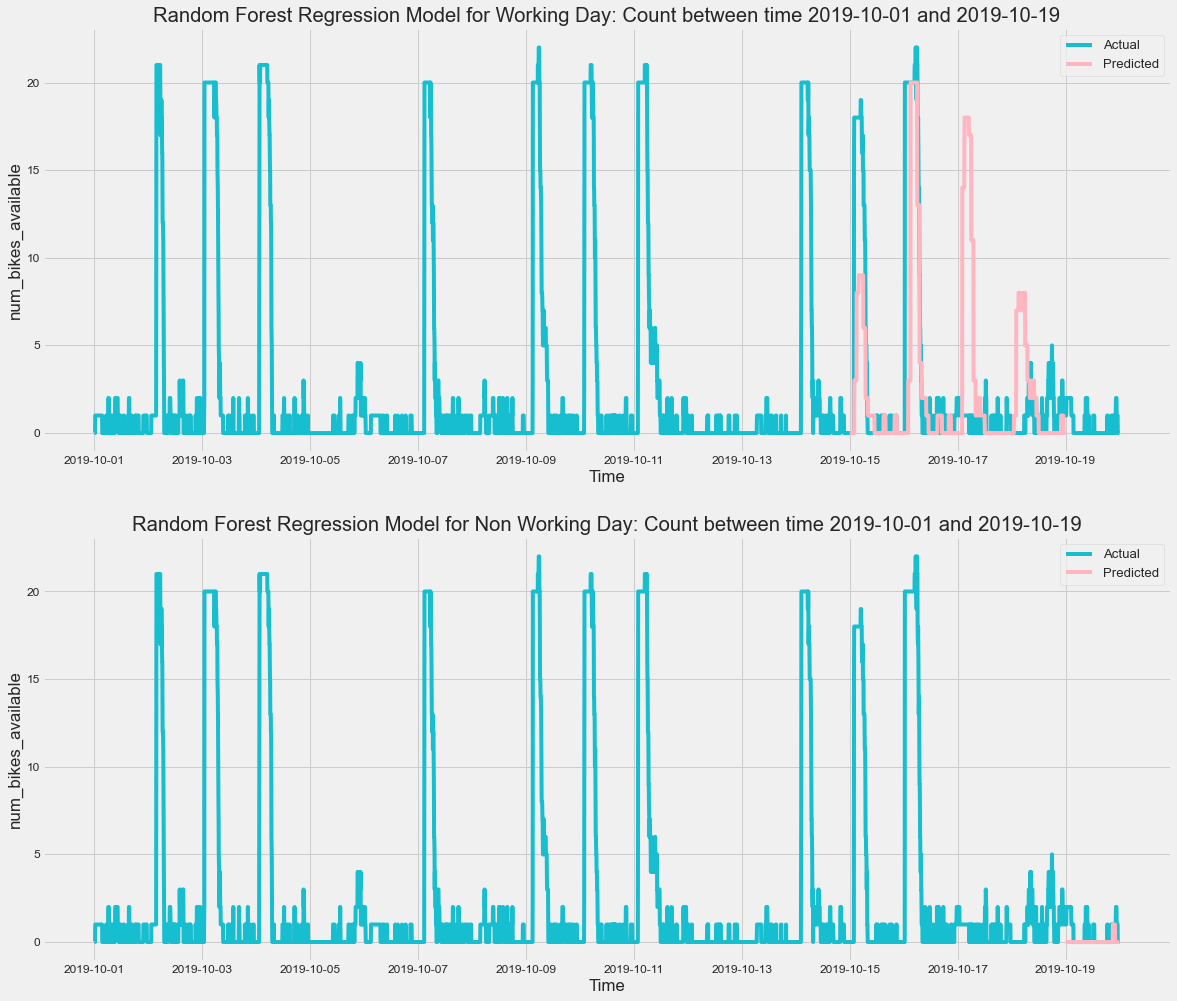

In [112]:
# Random Forest Regression Plot: True vs. Predicted for one month 
t_from, t_to = '2019-10-01', '2019-10-19'
y_test_predict =  pd.Series(y_predict_summary[1], index = ytest2.index) 
ytest_w_predict, ytest_nw_predict = y_test_predict[Xtest2.IsWeekday==1], y_test_predict[Xtest2.IsWeekday==0]
plot_true_vs_pred(df_2['num_bikes_available'], df_2['num_bikes_available'], round(ytest_w_predict), round(ytest_nw_predict), 'Random Forest Regression', t_from, t_to)

Feature Importance Plot

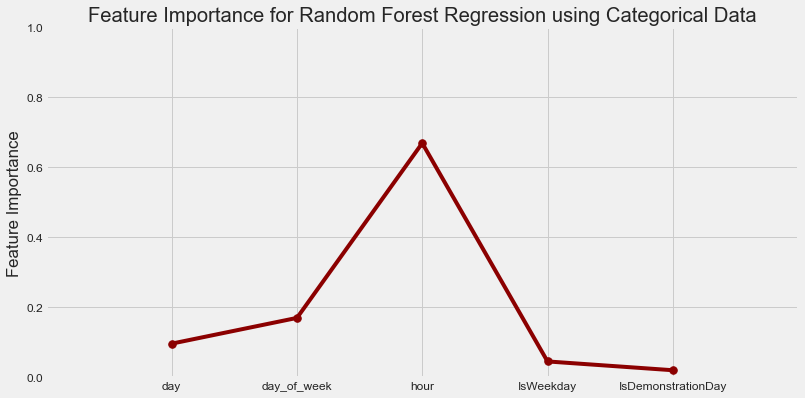

In [104]:
# Plotting the Feature Importance
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rfa.feature_importances_, marker='.', markersize=15, color='darkred')
plt.xticks(range(len(rfa.feature_importances_)), X2.columns)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression using Categorical Data')
axes.set(xlim=[-1, len(X2.columns)], ylim=[0, 1])

plt.show()

## Data and Function Definition
### Train/Validation/Test Split
First split the labelled data provided into internal training and testing set. Kaggle has held out data from 20th to the end of the month (for every month) as test set. Following a similar approach, split the labelled data (mydata_train) into

1. Training set, model_train
    · This will contain data of from the 1st to 15th of every month
    · This will be used to train our model
2. Testing set, model_test
    · This will contain data from 16th to 19th of every month
    · This will be used to test our model

The final test data for which labels (count) have not been provided corresponds to 20th to the end of every month

In [87]:
model_train, model_test, valid = df_1[df_1.index.day<15], df_1[(df_1.index.day>=15) & (df_1.index.day<=19)], df_1[df_1.index.day>19]
model_train2, model_test2, valid2 = df_1[df_1.index.day<15], df_1[(df_1.index.day>=15) & (df_1.index.day<=19)], df_1[df_1.index.day>19]

# Separating out the working an non-working data from the training set 
model_train_w = model_train[model_train['IsWeekday']==1]
model_train_nw = model_train[model_train['IsWeekday']==0]
model_train2_w = model_train2[model_train2['IsWeekday']==1]
model_train2_nw = model_train2[model_train2['IsWeekday']==0]

model_test_w = model_test[model_test['IsWeekday']==1]
model_test_nw = model_test[model_test['IsWeekday']==0]
model_test2_w = model_test2[model_test2['IsWeekday']==1]
model_test2_nw = model_test2[model_test2['IsWeekday']==0]

# Dropping workingday column 
model_train_w = model_train_w.drop('IsWeekday', axis=1)
model_train_nw = model_train_nw.drop('IsWeekday', axis=1)
model_train2_w = model_train2_w.drop('IsWeekday', axis=1)
model_train2_nw = model_train2_nw.drop('IsWeekday', axis=1)

model_test_w = model_test_w.drop('IsWeekday', axis=1)
model_test_nw = model_test_nw.drop('IsWeekday', axis=1)
model_test2_w = model_test2_w.drop('IsWeekday', axis=1)
model_test2_nw = model_test2_nw.drop('IsWeekday', axis=1)

In [88]:
# Contains Binary Vector Form of features (Obtained from OneHotEncoder transformed categorical feature)
X, X_w, X_nw = model_train.drop('num_bikes_available', axis=1), model_train_w.drop('num_bikes_available', axis=1), model_train_nw.drop('num_bikes_available', axis=1)
y, y_w, y_nw = model_train['num_bikes_available'], model_train_w['num_bikes_available'], model_train_nw['num_bikes_available']
logy, logy_w, logy_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

Xtest, Xtest_w, Xtest_nw = model_test.drop('num_bikes_available', axis=1), model_test_w.drop('num_bikes_available', axis=1), model_test_nw.drop('num_bikes_available', axis=1)
ytest, ytest_w, ytest_nw = model_test['num_bikes_available'], model_test_w['num_bikes_available'], model_test_nw['num_bikes_available']
logytest, logytest_w, logytest_nw = np.log1p(ytest), np.log1p(ytest_w), np.log1p(ytest_nw)

# Contains Categorical features instead of the Binary Vector Form
X2, X2_w, X2_nw = model_train2.drop('num_bikes_available', axis=1), model_train2_w.drop('num_bikes_available', axis=1), model_train2_nw.drop('num_bikes_available', axis=1)
y2, y2_w, y2_nw = model_train2['num_bikes_available'], model_train2_w['num_bikes_available'], model_train2_nw['num_bikes_available']
logy2, logy2_w, logy2_nw = np.log1p(y2), np.log1p(y2_w), np.log1p(y2_nw)

Xtest2, Xtest2_w, Xtest2_nw = model_test2.drop('num_bikes_available', axis=1), model_test2_w.drop('num_bikes_available', axis=1), model_test2_nw.drop('num_bikes_available', axis=1)
ytest2, ytest2_w, ytest2_nw = model_test2['num_bikes_available'], model_test2_w['num_bikes_available'], model_test2_nw['num_bikes_available']
logytest2, logytest2_w, logytest2_nw = np.log1p(y), np.log1p(y_w), np.log1p(y_nw)

# Data Frame to store all the RMSLE scores for various algorithms
algo_score = pd.DataFrame()
algo_score.index.name = 'Modelling Algo'
algo_score['Train RMSLE (Working Day)'] = None
algo_score['Train RMSLE (Non Working Day)'] = None
algo_score['Train RMSLE (Average)'] = None
algo_score['Test RMSLE (Working Day)'] = None
algo_score['Test RMSLE (Non Working Day)'] = None
algo_score['Test RMSLE (Average)'] = None
algo_score['Validation RMSLE (Working Day)'] = None
algo_score['Validation RMSLE (Non Working Day)'] = None
algo_score['Validation RMSLE (Average)'] = None
algo_score['Hyperparameters-Working'] = None
algo_score['Hyperparameters-Non Working'] = None
algo_score['Training+Test Time (sec)'] = None
cv_time = []

# Data Frame for second level of prediction. Collect the predicted y values for training and test set of data
ypred_train = pd.DataFrame(index = X.index)
ypred_test = pd.DataFrame(index = Xtest.index)
ypred_train['num_bikes_available'], ypred_test['num_bikes_available'] = y, ytest

## Ensemble Model - Random Forest
### Single Model for Working and Non-working days + Categorical Features
Since Random Forest Regression predicts based on decision tree, we expect it to handle categorical features including hours, months, working and non-working day gracefully. Let us start off by including those features into our model (instead of the using the transformed features + 2 models for working and non-working) and see its performance first. It would be a simple single model and easier to analyze

#### Hyperparameter Tuning
Procedure - tuning 1 parameter at a time

First obtain n_estimators using default values of the remaining parameters
Tune for the max_features using the best n_estimators
Tune for min_samples_leaf using the best n_estimators and max_features
Tune for max_depth using the best n_estimators, max_features and min_samples_leaf
Tune for min_samples_split using the best n_estimators, max_features, min_samples_leaf and max_depth

In [89]:
## Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters. 
## Commented it out since it takes a lot of time to run. Using the best parameters obtained via the below search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': [500, 1000, 2000, 5000, 7000, 10000, 12000, 15000]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['auto', 'sqrt', 'log2']}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['sqrt'], 'min_samples_leaf':[1, 3, 7, 10, 20, 50]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[5, 8, 10, 20, 30, 40, 50, 70]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[10], 'min_samples_split':[0.0001, 0.001, 0.002, 0.005, 0.01]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))

#### Best parameters for Random Forest Regression Model: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 0.002, 'n_estimators': 2000}

Model Fit + Predict

In [90]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Best parameters obtained via GridSearchCV above
best_n_estimators, best_max_features = 2000, 'sqrt'
best_min_samples_leaf, best_max_depth = 1, 10
param_summary = ['n_estimators: {}, max_features: {}, min_samples_leaf: {}, max_depth: {}'.format(best_n_estimators, best_max_features, best_min_samples_leaf, best_max_depth), 
                 'n_estimators: {}, max_features: {}, min_samples_leaf: {}, max_depth: {}'.format(best_n_estimators, best_max_features, best_min_samples_leaf, best_max_depth),'']

rfa = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, 
                           min_samples_leaf = best_min_samples_leaf, max_depth = best_max_depth, random_state=42)

rmsle_summary, y_predict_summary = model_fit(rfa, X2, Xtest2, y2, ytest2)
ypred_test['RF1'] = y_predict_summary[1]

In [91]:
rmsle_val_summary, y_predict_val_summary = cross_val(rfa, X2, y2)
ypred_train['RF1'] = y_predict_val_summary[0]

algo_score.loc['Random Forest-Categorical+Single'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Random Forest-Categorical+Single']]

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Random Forest-Categorical+Single,0.330292,0.191948,0.297406,0.978522,0.475783,0.900027,0.67843,0.3762,0.607617,"n_estimators: 2000, max_features: sqrt, min_sa...","n_estimators: 2000, max_features: sqrt, min_sa...",


In [92]:
algo_score.loc['Random Forest-Categorical+Single', 'Training+Test Time (sec)'] = 5.48
cv_time.append(19.9)

Prediction Plot for Test

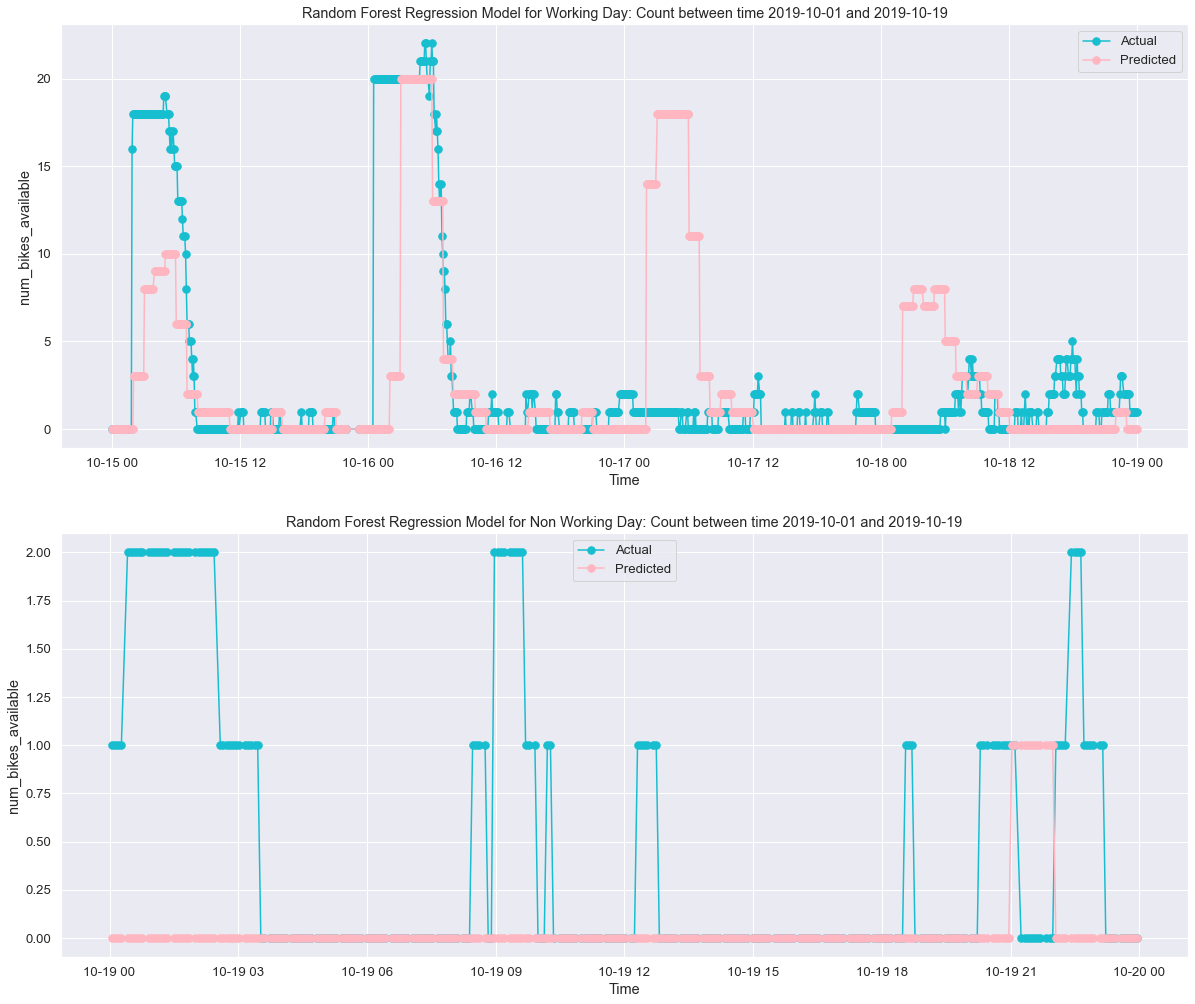

In [93]:
# Random Forest Regression Plot: True vs. Predicted for one month 
t_from, t_to = '2019-10-01', '2019-10-19'
y_test_predict =  pd.Series(y_predict_summary[1], index = ytest2.index) 
ytest_w_predict, ytest_nw_predict = y_test_predict[Xtest2.IsWeekday==1], y_test_predict[Xtest2.IsWeekday==0]
plot_true_vs_pred(ytest2_w, ytest2_nw, round(ytest_w_predict), round(ytest_nw_predict), 'Random Forest Regression', t_from, t_to)

Feature Importance Plot

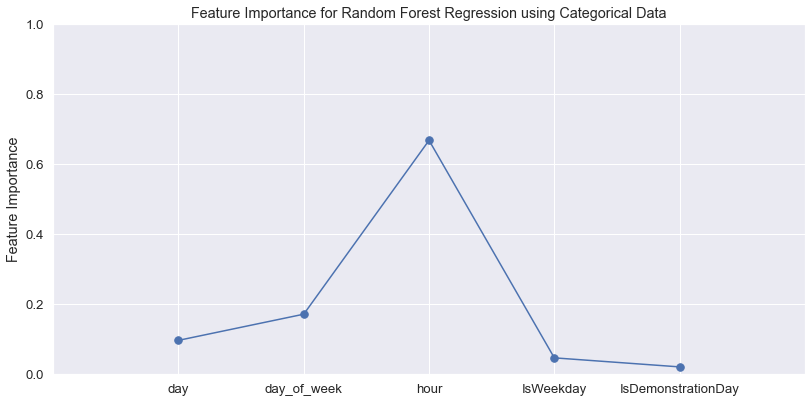

In [95]:
# Plotting the Feature Importance
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rfa.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rfa.feature_importances_)), X2.columns)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression using Categorical Data')
axes.set(xlim=[-1, len(X2.columns)], ylim=[0, 1])

plt.show()

## Ensemble Model - Random Forest
### Model for Working + Categorical Features
Since Random Forest Regression predicts based on decision tree, we expect it to handle categorical features including hours, months, working day gracefully. Let us start off by including those features into our model (instead of the using the transformed features + 2 models for working and non-working) and see its performance first. It would be a simple single model and easier to analyze

#### Hyperparameter Tuning
Procedure - tuning 1 parameter at a time

First obtain n_estimators using default values of the remaining parameters
Tune for the max_features using the best n_estimators
Tune for min_samples_leaf using the best n_estimators and max_features
Tune for max_depth using the best n_estimators, max_features and min_samples_leaf
Tune for min_samples_split using the best n_estimators, max_features, min_samples_leaf and max_depth

In [70]:
## Random Forest Regression Hyperparameter tuning using Grid Search to obtain the best parameters. 
## Commented it out since it takes a lot of time to run. Using the best parameters obtained via the below search
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# param_grid = {'n_estimators': [500, 1000, 2000, 5000, 7000, 10000, 12000, 15000]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['auto', 'sqrt', 'log2']}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['sqrt'], 'min_samples_leaf':[1, 3, 7, 10, 20, 50]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[5, 8, 10, 20, 30, 40, 50, 70]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# param_grid = {'n_estimators': [2000], 'max_features':['sqrt'], 'min_samples_leaf':[1], 'max_depth':[10], 'min_samples_split':[0.0001, 0.001, 0.002, 0.005, 0.01]}
# rf_main = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring=rmsle_cv)
# rf_main.fit(X2, y2)

# print('Best parameters for Random Forest Regression Model: {}'.format(rf_main.best_params_))

#### Best parameters for Random Forest Regression Model: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 0.002, 'n_estimators': 2000}

Model Fit + Predict

In [71]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor

# Best parameters obtained via GridSearchCV above
best_n_estimators, best_max_features = 2000, 'sqrt'
best_min_samples_leaf, best_max_depth = 1, 10
param_summary = ['n_estimators: {}, max_features: {}, min_samples_leaf: {}, max_depth: {}'.format(best_n_estimators, best_max_features, best_min_samples_leaf, best_max_depth), 
                 'n_estimators: {}, max_features: {}, min_samples_leaf: {}, max_depth: {}'.format(best_n_estimators, best_max_features, best_min_samples_leaf, best_max_depth),'']

rfa = RandomForestRegressor(n_estimators = best_n_estimators, max_features = best_max_features, 
                           min_samples_leaf = best_min_samples_leaf, max_depth = best_max_depth, random_state=42)

rmsle_summary, y_predict_summary = model_fit(rfa, X2, Xtest2, y2, ytest2)
ypred_test['RF1'] = y_predict_summary[1]

In [72]:
rmsle_val_summary, y_predict_val_summary = cross_val(rfa, X2, y2)
ypred_train['RF1'] = y_predict_val_summary[0]

algo_score.loc['Random Forest-Categorical+Single'] = rmsle_summary+rmsle_val_summary+param_summary
algo_score.loc[['Random Forest-Categorical+Single']]

,Train RMSLE (Working Day),Train RMSLE (Non Working Day),Train RMSLE (Average),Test RMSLE (Working Day),Test RMSLE (Non Working Day),Test RMSLE (Average),Validation RMSLE (Working Day),Validation RMSLE (Non Working Day),Validation RMSLE (Average),Hyperparameters-Working,Hyperparameters-Non Working,Training+Test Time (sec)
Modelling Algo,,,,,,,,,,,,
Random Forest-Categorical+Single,0.330292,0.191948,0.297406,0.978522,0.475783,0.900027,0.67843,0.3762,0.607617,"n_estimators: 2000, max_features: sqrt, min_sa...","n_estimators: 2000, max_features: sqrt, min_sa...",


In [73]:
algo_score.loc['Random Forest-Categorical+Single', 'Training+Test Time (sec)'] = 5.48
cv_time.append(19.9)

Prediction Plot for Test

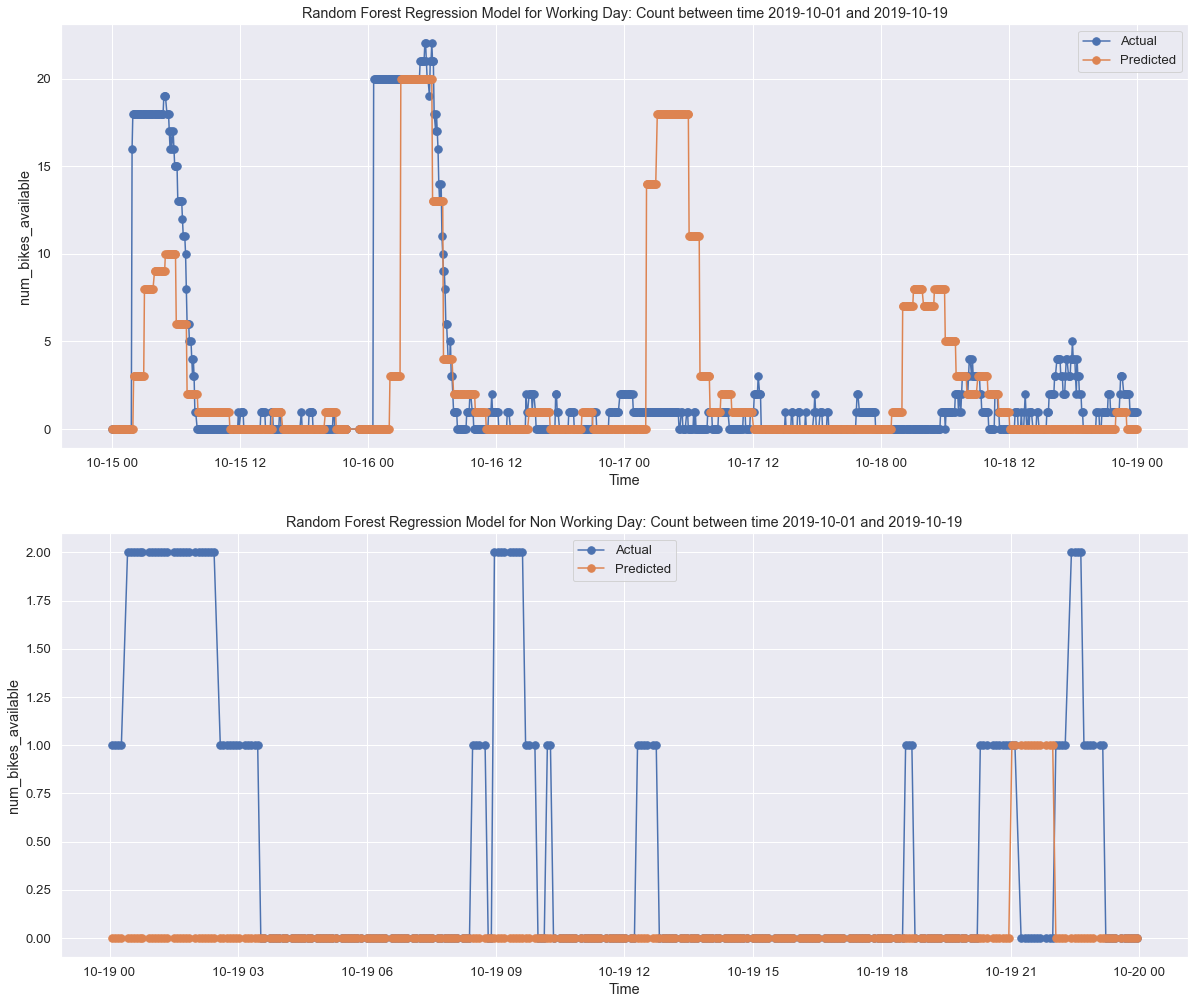

In [74]:
# Random Forest Regression Plot: True vs. Predicted for one month 
t_from, t_to = '2019-10-01', '2019-10-19'
y_test_predict =  pd.Series(y_predict_summary[1], index = ytest2.index) 
ytest_w_predict, ytest_nw_predict = y_test_predict[Xtest2.IsWeekday==1], y_test_predict[Xtest2.IsWeekday==0]
plot_true_vs_pred(ytest2_w, ytest2_nw, round(ytest_w_predict), round(ytest_nw_predict), 'Random Forest Regression', t_from, t_to)

Feature Importance Plot

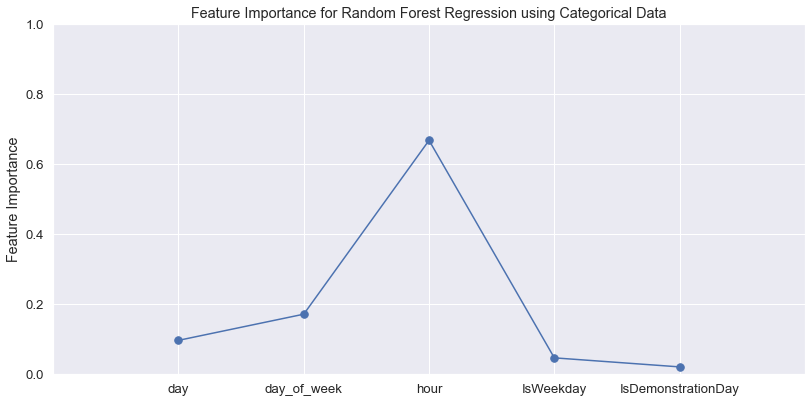

In [76]:
# Plotting the Feature Importance
fig = plt.figure(figsize=(12, 6))
axes = fig.add_subplot(1, 1, 1)
axes.plot(rfa.feature_importances_, marker='.', markersize=15)
plt.xticks(range(len(rfa.feature_importances_)), X2.columns)
axes.set(ylabel='Feature Importance', title='Feature Importance for Random Forest Regression using Categorical Data')
axes.set(xlim=[-1, len(X2.columns)], ylim=[0, 1])

plt.show()

In complex environments, such as this one, there exist a high number of parameters which may have an impact on the system that is going to be studied. Considering multiple sources of data and different features can produce more accurate predictions. Variables taken into account: day, day of week, hour, is week day, is demonstration day.

This kind of models may improve their performance by adding external information such as weather prediction, close connections to other public transports, etc.